# Q2 Linear Regression

how to run:

1. change directories of x_data and y_data respectively
2. run all cells below until end

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import sys

## 2A

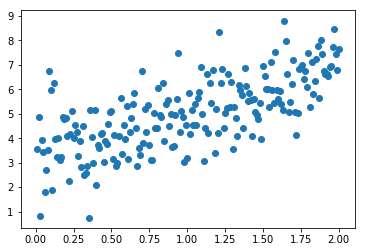

In [2]:
x_data = np.loadtxt('/Users/anthonymunoz/ISTDTerm6/MachineLearning/data/2/hw1x.dat')
y_data = np.loadtxt('/Users/anthonymunoz/ISTDTerm6/MachineLearning/data/2/hw1y.dat')
plt.scatter(x_data, y_data)

In [3]:
ones = np.ones(len(x_data))
new_x = np.column_stack((x_data, ones))

In [4]:
def closed_form(x, y):
    n = len(x)
    trans_x = np.transpose(x)
    
    b = (1/n) * np.dot(trans_x, y)
    a = np.linalg.inv(((1/n) * np.dot(trans_x, x)))
                      
    weight = np.dot(a, b)
    return weight

## 2B

The weight vector is: [1.78157138 3.2447227 ]


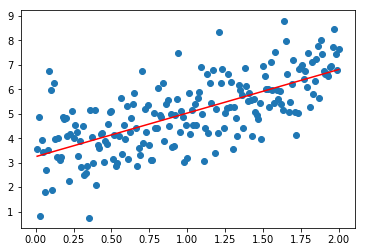

In [5]:
def predict(x, weight):
    return np.dot(x, weight)

weight = closed_form(new_x, y_data)

plt.scatter(x_data, y_data)
plt.plot(x_data, predict(new_x, weight),color='red')
print("The weight vector is: {}".format(weight))

## 2C

In [6]:
def empirical_risk(x,y,weight):
    sum = (1/len(x)) * np.sum(np.square(y - np.dot(x, weight))/2)
    return sum

print("The Empirical risk: {}".format(empirical_risk(new_x, y_data, weight)))

The Empirical risk: 0.5812605752543937


## 2D

In [7]:
def gradient_descent(x, y, learning_rate = 0.01, iterations = 100):
    weight = np.zeros(2)
    min_weight = 0
    min_risk = sys.maxsize

    for j in range(iterations):
        for i in range(len(x)):         
            randx = x[i]
            randy = y[i]
            weight += (learning_rate) * np.dot(np.array(randy - np.dot(weight, randx)), randx)
            risk = empirical_risk(x, y, weight)
            if risk < min_risk:
                min_risk = risk
                min_weight = weight
    return min_weight
print("The best weight using gradient descent: {}".format(gradient_descent(new_x, y_data)))

The best weight using gradient descent: [1.96402963 3.13074422]


## 2E

In [8]:
def stochastic_descent(x, y, learning_rate = 0.01, iterations = 50):
    weight = np.zeros(2)
    min_weight = 0
    min_risk = sys.maxsize
    random_list = np.random.permutation(len(x))
    for j in range(iterations):
        for i in range(len(x)):     
        #randomt = random.randint(0, len(x) - 1)
            randx = x[random_list[i]]
            randy = y[random_list[i]]
            weight += (learning_rate) * np.dot(np.array(randy - np.dot(weight, randx)), randx)
            risk = empirical_risk(x, y, weight)
            if risk < min_risk:
                min_risk = risk
                min_weight = weight  
    return min_weight


print("The best weight for stochastic gradient descent is: " + str(stochastic_descent(new_x,y_data)))

The best weight for stochastic gradient descent is: [1.83178806 3.29452485]


## 2F

In [9]:
def poly_transform(x, d):
    ones = np.ones(len(x))
    x_new = np.copy(x)
    
    for power in range(2, d + 1):
        new_feature = np.power(x, power)
        x_new = np.column_stack((x_new, new_feature))
    
    return np.column_stack((x_new, ones))

def PolyRegress(x, y, d):
    
    weight = closed_form(poly_transform(x, d), y)
    
    return weight


## 2G

iteration: 2
Error for x2 is: 0.5703016121648224


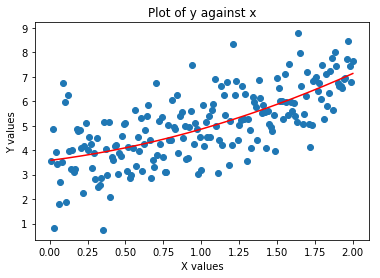

iteration: 3
Error for x2 is: 0.570084436469135


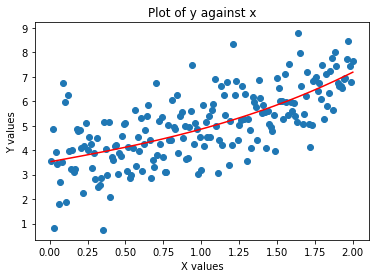

iteration: 4
Error for x2 is: 0.5646163879286429


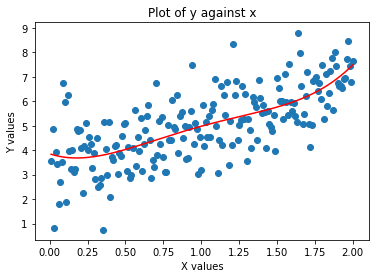

iteration: 5
Error for x2 is: 0.56389681847492


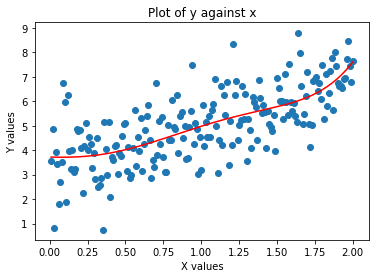

iteration: 6
Error for x2 is: 0.5613433038902966


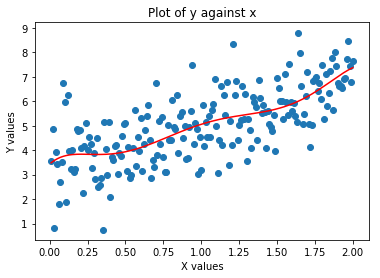

iteration: 7
Error for x2 is: 0.5562352515818979


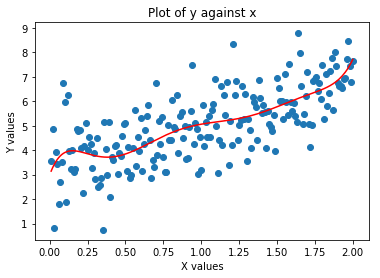

iteration: 8
Error for x2 is: 0.5537805799892443


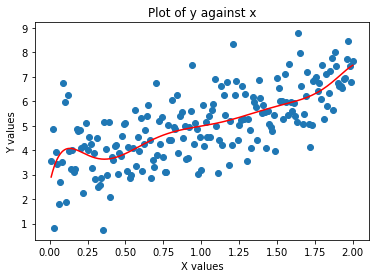

iteration: 9
Error for x2 is: 0.5529232165489072


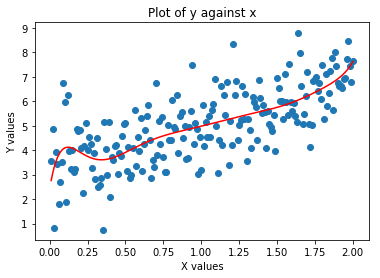

iteration: 10
Error for x2 is: 0.5526519570677355


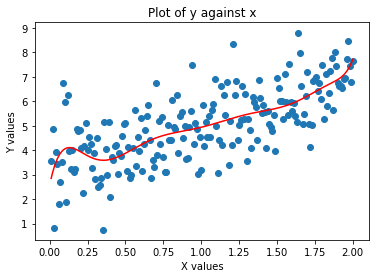

iteration: 11
Error for x2 is: 0.5746973710206246


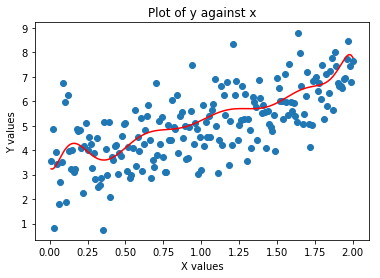

iteration: 12
Error for x2 is: 2.8443194205203794


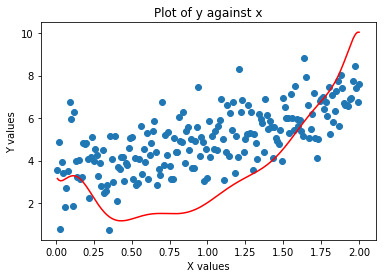

iteration: 13
Error for x2 is: 103.64885698472375


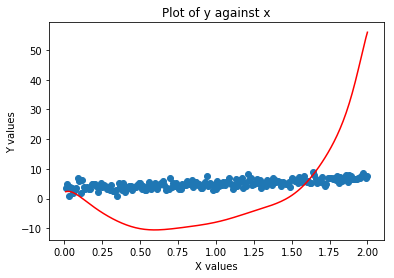

In [10]:
for i in range(2,14):
    poly_x = poly_transform(x_data, i)
    poly_weight = PolyRegress(x_data, y_data, i)
    poly_error = empirical_risk(poly_x, y_data, poly_weight)
    print("iteration: {}".format(i))
    print("Error for x2 is: {}".format(poly_error))
   # print("The weight for the quadratic is: {}".format(poly_weight))
    
    plt.scatter(x_data, y_data)
    plt.plot(x_data, predict(poly_x, poly_weight),color='red')
    plt.title("Plot of y against x")
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.show()
    







### Answer for 2(g) including the plots above

The error for order = 10 is: 0.5527744684293917  
The error for order = 11 is: 0.9778903432316673  
The error for order = 12 is: 13.457169365682747   
The error for order = 13 is: 62.30915029566786

Therefore, from polynomial powers of 11 onwards, the error increases significantly. 